In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import matplotlib
# %matplotlib notebook

In [2]:
def Convolve(matrix,kernel,stride): #Image, kernel as matrix, stride in (x,y)
    
    conv_shape_x = (matrix.shape[1] -kernel.shape[1] +1)/stride[0]
    conv_shape_y = (matrix.shape[0] -kernel.shape[0] +1)/stride[1]
    convolved = np.ones((int(conv_shape_y),int(conv_shape_x)))
    
    for y,y_conv in zip(range(0, matrix.shape[0]-kernel.shape[1] +1, stride[1]),range(int(conv_shape_y))):
        for x,x_conv in zip(range(0,matrix.shape[1]-kernel.shape[0] +1,stride [0]),range(int(conv_shape_x))):
            summed = np.sum(matrix[y:(y+kernel.shape[0]),x:(x+kernel.shape[1])]*kernel)
            convolved[y_conv,x_conv] = summed
    return convolved

In [3]:

class Filter(object):
    def __init__(self):
        pass
    def identity(self):
        return np.array([ [0,0,0],
                          [0,1,0],
                          [0,0,0]
                          ])
    def edge_detection(self):
         return np.array([   [0,-1,0],
                              [-1,4,-1],
                              [0,-1,0]
                          ])
    def sharpen(self):
        return np.array([ [0,-1,0],
                          [-1,8,-1],
                          [0,-1,0]
                          ])
    def box_blur(self):
        return np.ones((3,3))/9

    def gaussian_blur(self):
        return np.array([[1,2,1],
                          [2,4,2],
                          [1,2,1]
                          ])/16
    def emboss(self):
        return np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]
                          ])
    def sobel_vertical(self):
        return np.array([[-1,0,1],
                          [-2,0,2],
                          [-1,0,1]
                          ])
    def sobel_horizontal(self):
        return np.array([[-1,-2,-1],
                          [0,0,0],
                          [1,2,1]
                          ])
    
filters = Filter()

### Effect of Convolution on Noise

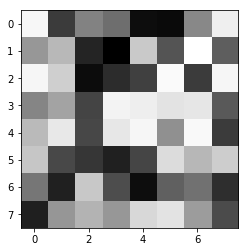

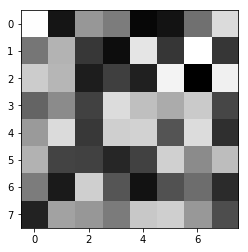

In [4]:
a = np.random.rand(10,10)
plt.imshow(a[1:-1,1:-1],cmap = 'gray')
plt.show()
plt.imshow(Convolve(a,filters.sharpen(),(1,1)),cmap = 'gray')

### Effect of Convolution on Image

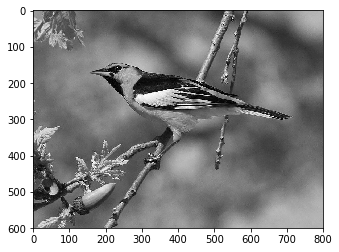

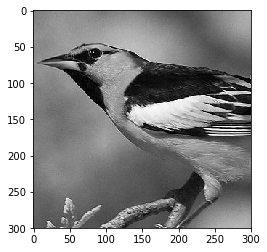

In [5]:
img = io.imread( '//media/nicolas/0C1A9D0A1A9CF1C6/Seafile/Intro to Machine Learning/Pics Convolution/bird2.jpg',as_grey=True ) 
# img = io.imread( '//media/nicolas/0C1A9D0A1A9CF1C6/Seafile/Intro to Machine Learning/Pics Convolution/mole 3_dark.jpg',as_grey=True ) 
plt.imshow(img, cmap = 'gray')
plt.show()
x = 150  # start of crop for x
y = 100  # start of crop for y
crop_size = 300
plt.imshow(img[y:y+crop_size,x:x+crop_size],cmap= 'gray')
img = img[y:y+crop_size,x:x+crop_size]

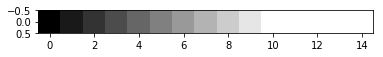

In [6]:
plt.imshow(np.array([[x/10 for x in range(0,15)]]),cmap = 'gray', vmax = 1)

In [7]:
def Annotate (kernel,img):
    for i in [x for x in range(kernel().shape[1])]:
        for j in [x for x in range(kernel().shape[0])]:
            if kernel()[j,i] == 0:
                img.annotate(kernel()[j,i],xy=(i,j),color='white')
            else:
                img.annotate(kernel()[j,i],xy=(i,j),color='gray')


/home/nicolas/anaconda3/envs/deeplearning/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Sobel horizontal + Vertical Overlaid')

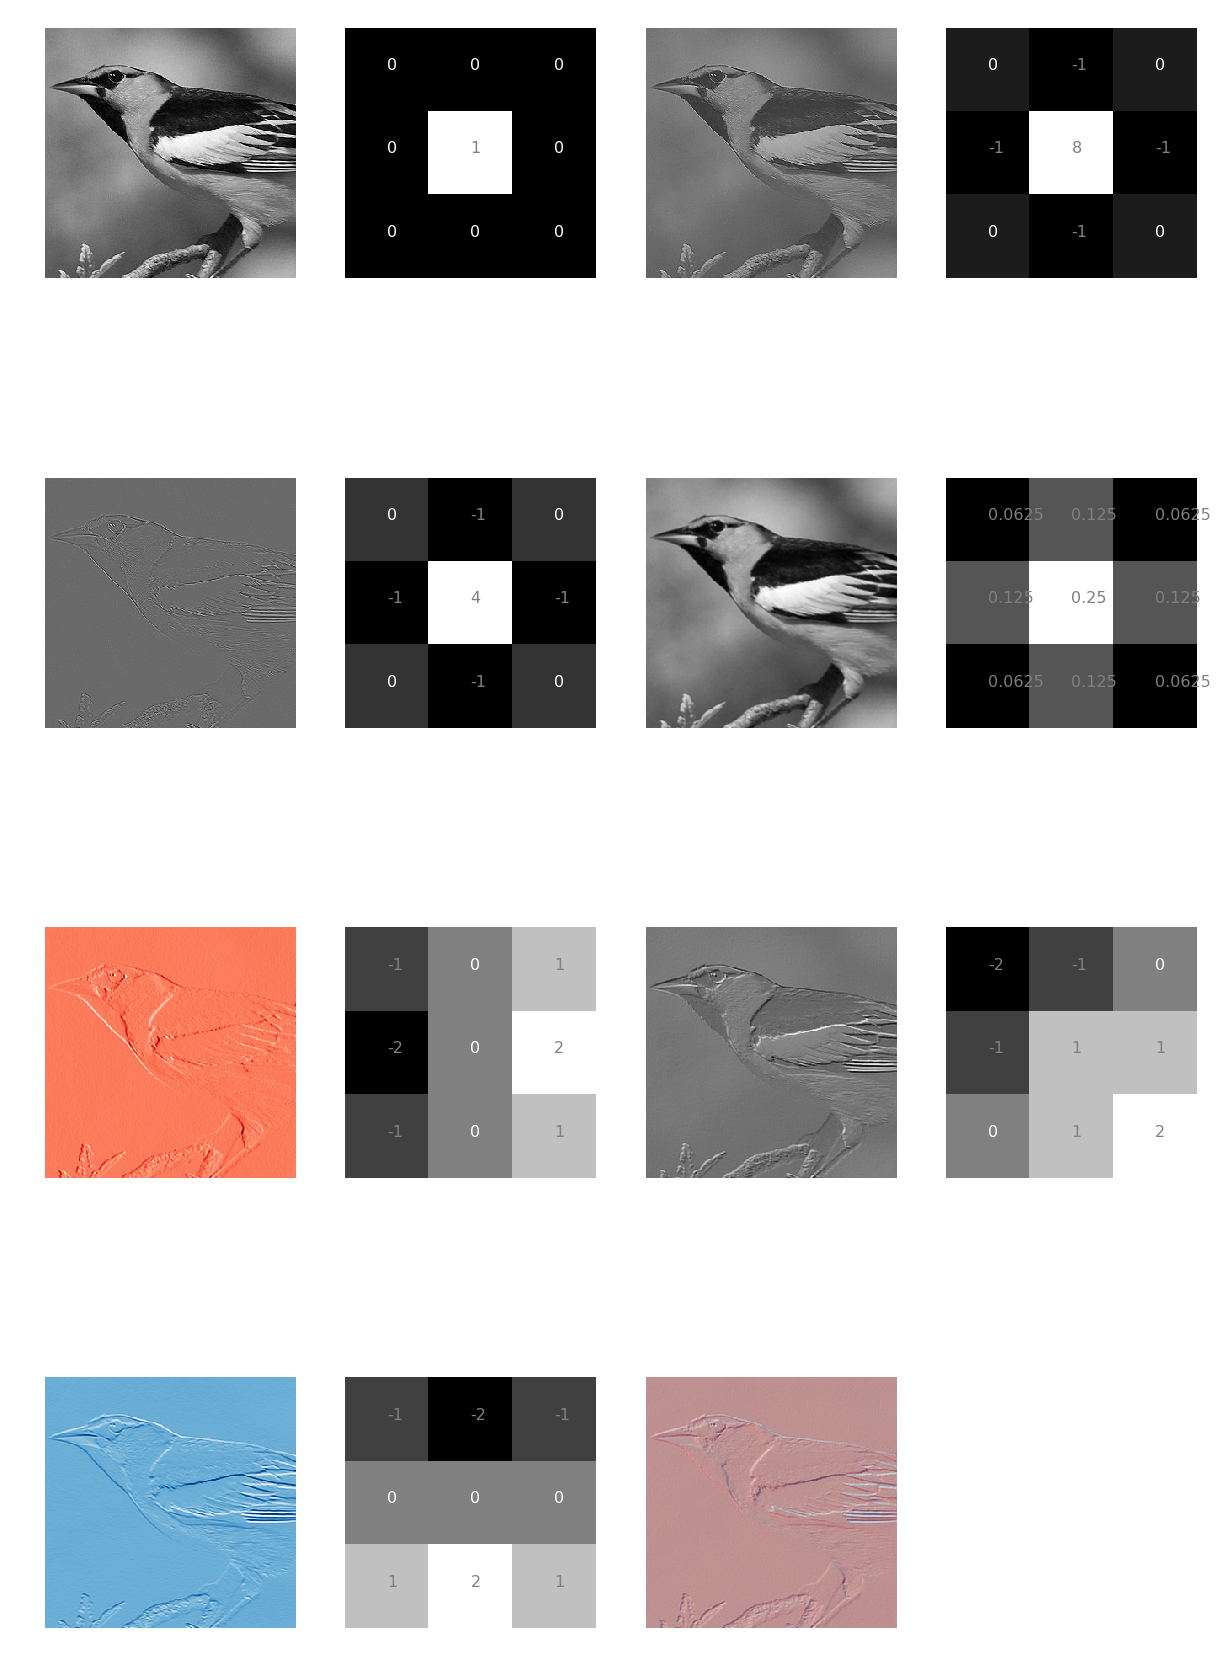

In [8]:
matplotlib.rcParams.update({'font.size': 16})

fig = plt.figure(figsize = (40,40))
plt.subplots_adjust(left=0.5, bottom=None, right=None, top=None,  # this is to separate the images vertically a bit, feel free to comment it out
                wspace=None, hspace=None)

title_color = 'white' #color for image titles, the color white is due to my notebook having a dark theme, change if appropiate

kernel_list = [0, filters.identity, filters.sharpen, filters.edge_detection, filters.gaussian_blur,
               filters.sobel_vertical, filters.emboss, filters.sobel_horizontal]  #the 0 at the start is to comply with matplotlib subplot numbering

for i in range(1,14,2):
    img1 = fig.add_subplot(5,4,i)     #create subplot
    plt.axis('off') #remove axis
    kernel_string = str.split(str.split(str(kernel_list[int(i/2)+1]))[2],'.')[1]
    
    if  (kernel_string != 'sobel_vertical') and (kernel_string != 'sobel_horizontal'):
        plt.imshow(Convolve(img,kernel_list[int(i/2)+1](),(1,1)),cmap='gray')  #show convolved image
    elif kernel_string == 'sobel_vertical':
        plt.imshow(Convolve(img,kernel_list[int(i/2)+1](),(1,1)),cmap='Reds')  #show convolved image
    elif kernel_string == 'sobel_horizontal':
        plt.imshow(Convolve(img,kernel_list[int(i/2)+1](),(1,1)),cmap='Blues')  #show convolved image
    img1.set_title(kernel_string,color = title_color)      #set image title, 
        
    img1 = fig.add_subplot(5,4,i+1)      # create kernel image subplot
    plt.axis('off')  #remove axis
    plt.imshow(kernel_list[int(i/2)+1](),cmap='gray')      #show kernel image
    img1.set_title(kernel_string,color = title_color)      #set kernel image title
    Annotate(kernel_list[int(i/2)+1],img1)       #overlay the kernel values over the kernel image

img2 = fig.add_subplot(5,4,15)
plt.imshow(Convolve(img,filters.sobel_horizontal(),(1,1)),cmap='Reds',alpha=1)
plt.axis('off')
img2 = fig.add_subplot(5,4,15)                # use the same subplot to overlay the two Sobel (horizontal + vertical) kernels
plt.axis('off')
plt.imshow(Convolve(img,filters.sobel_vertical(),(1,1)),cmap='Blues',alpha=0.5)    #alpha = 0.5 to make the top image transparent
img2.set_title('Sobel horizontal + Vertical Overlaid',color = title_color)


In [9]:
'''
Below are all the subplots explicitely written out, plt.axis('off') is missing from all but the first

fig = plt.figure(figsize = (40,40))
plt.subplots_adjust(left=0.5, bottom=None, right=None, top=None,  # this is to separate the images vertically a bit, feel free to comment it out
                wspace=None, hspace=None)

img1 = fig.add_subplot(5,4,1)     #create subplot
plt.axis('off')
plt.imshow(Convolve(img,filters.identity(),(1,1)),cmap='gray')  #show convolved image
img1.set_title('Identity',color = title_color)      #set image title, 
img1 = fig.add_subplot(5,4,2)      # create kernel image subplot
plt.axis('off')
plt.imshow(filters.identity(),cmap='gray')      #show kernel image
img1.set_title('Identity',color = title_color)      #set kernel image title
Annotate(filters.identity,img1)       #overlay the kernel values over the kernel image

img1 = fig.add_subplot(5,4,3)
plt.imshow(Convolve(img,filters.sharpen(),(1,1))/Convolve(img,filters.sharpen(),(1,1)).max(),cmap='gray')
img1.set_title('Sharpen',color = title_color)
img2 = fig.add_subplot(5,4,4)
plt.imshow(filters.sharpen(),cmap='gray')
img2.set_title('Sharpen',color = title_color)
Annotate(filters.sharpen,img2)

img2 = fig.add_subplot(5,4,5)
plt.imshow(Convolve(img,filters.edge_detection(),(1,1)),cmap='gray')
img2.set_title('Edge Detection',color = title_color)
img2 = fig.add_subplot(5,4,6)
plt.imshow(filters.edge_detection(),cmap='gray')
img2.set_title('Edge Detection',color = title_color)
Annotate(filters.edge_detection,img2)
        
img3 = fig.add_subplot(5,4,7)
plt.imshow(Convolve(img,filters.gaussian_blur(),(1,1)),cmap='gray')
img3.set_title('Gaussian Blur',color = title_color)
img3 = fig.add_subplot(5,4,8)
plt.imshow(filters.gaussian_blur(),cmap='gray')
img3.set_title('Gaussian Blur',color = title_color)
Annotate(filters.gaussian_blur,img3)

img2 = fig.add_subplot(5,4,9)
plt.imshow(Convolve(img,filters.Sobel_vertical(),(1,1)),cmap='Reds')
img2.set_title('Sobel Vertical (artificially colored)',color = title_color)
img2 = fig.add_subplot(5,4,10)
plt.imshow(filters.Sobel_vertical(),cmap = 'gray')
img2.set_title('Sobel Vertical',color = title_color)
Annotate(filters.Sobel_vertical,img2)

img2 = fig.add_subplot(5,4,11)
plt.imshow(Convolve(img,filters.Emboss(),(1,1)),cmap='gray')
img2.set_title('Emboss',color = title_color)
img2 = fig.add_subplot(5,4,12)
plt.imshow(filters.Emboss(),cmap='gray')
img2.set_title('Emboss',color = title_color)
Annotate(filters.Emboss,img2)

img2 = fig.add_subplot(5,4,13)
plt.imshow(Convolve(img,filters.Sobel_horizontal(),(1,1)),cmap='Blues')
img2.set_title('Sobel Horizontal (artificially colored)',color = title_color)
img2 = fig.add_subplot(5,4,14)
plt.imshow(filters.Sobel_horizontal(),cmap= 'gray')
img2.set_title('Sobel Horizontal',color = title_color)
Annotate(filters.Sobel_horizontal,img2)

'''

"\nBelow are all the subplots explicitely written out, plt.axis('off') is missing from all but the first\n\nfig = plt.figure(figsize = (40,40))\nplt.subplots_adjust(left=0.5, bottom=None, right=None, top=None,  # this is to separate the images vertically a bit, feel free to comment it out\n                wspace=None, hspace=None)\n\nimg1 = fig.add_subplot(5,4,1)     #create subplot\nplt.axis('off')\nplt.imshow(Convolve(img,filters.identity(),(1,1)),cmap='gray')  #show convolved image\nimg1.set_title('Identity',color = title_color)      #set image title, \nimg1 = fig.add_subplot(5,4,2)      # create kernel image subplot\nplt.axis('off')\nplt.imshow(filters.identity(),cmap='gray')      #show kernel image\nimg1.set_title('Identity',color = title_color)      #set kernel image title\nAnnotate(filters.identity,img1)       #overlay the kernel values over the kernel image\n\nimg1 = fig.add_subplot(5,4,3)\nplt.imshow(Convolve(img,filters.sharpen(),(1,1))/Convolve(img,filters.sharpen(),(1,1)).m